# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# **Loading the data**

In [3]:
data=pd.read_csv('/content/Wine_clust  (1).csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Basic Details about data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.shape

(178, 13)

In [8]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# **checking for null values**

In [9]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# **Checking for outliers**

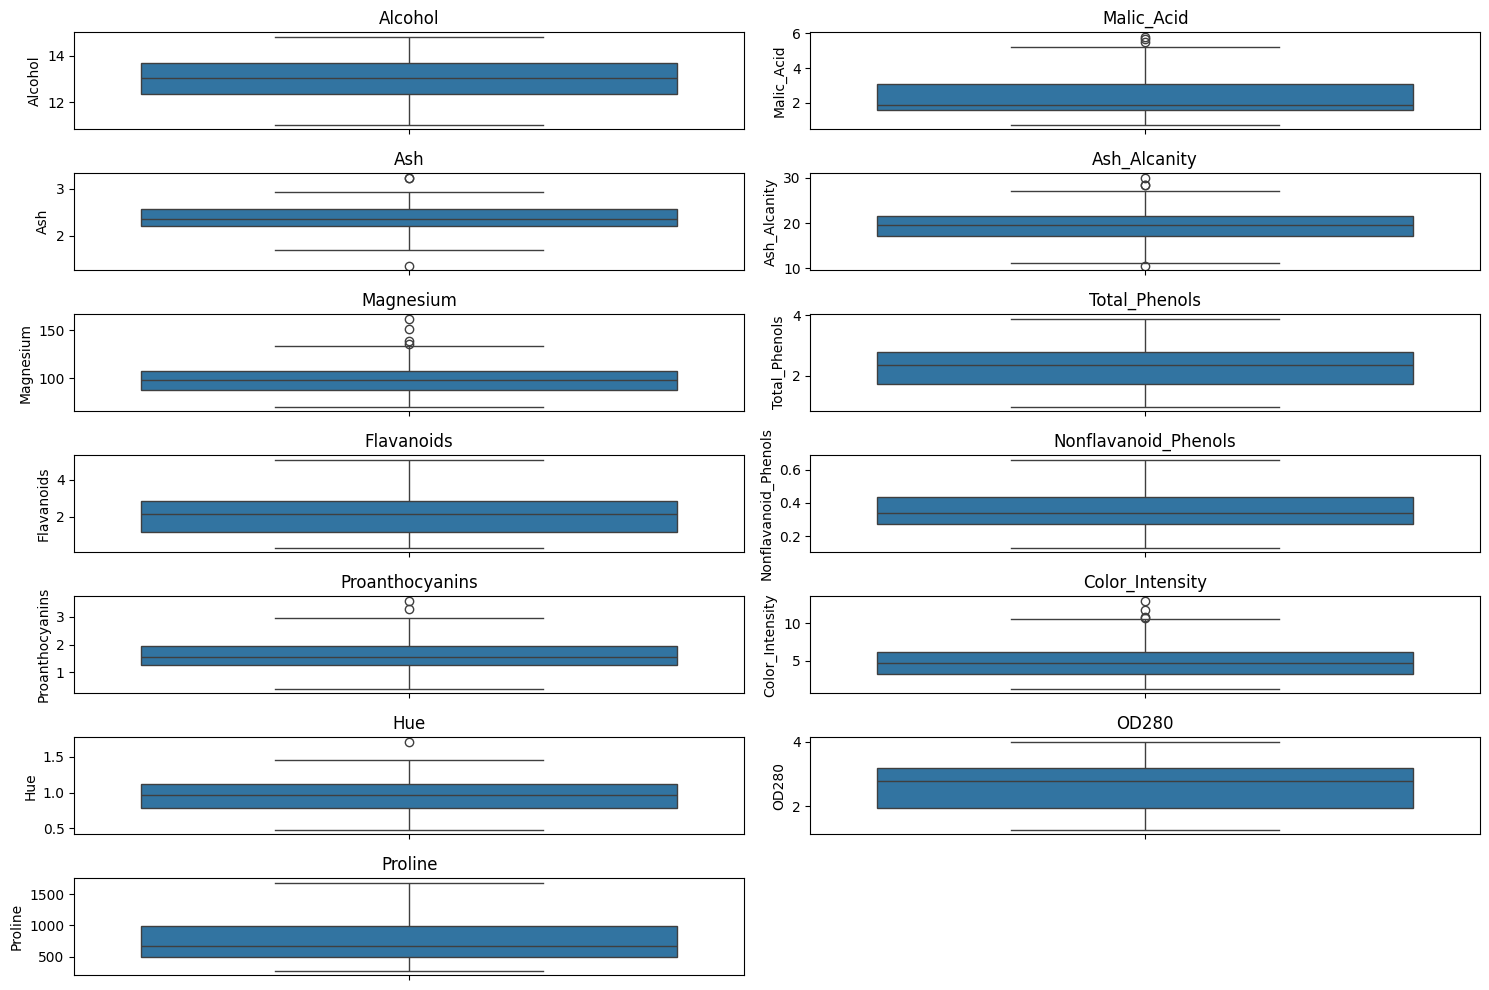

In [10]:
def plot_all_boxplots(data):
    # Selecting  numerical columns
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # Setting the size of the overall plot
    plt.figure(figsize=(15, 10))

    # Creating a boxplot for each numerical column
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) // 2 + 1, 2, i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

#Calling the function to plot boxplots
plot_all_boxplots(data)

# **Handling Outliers**

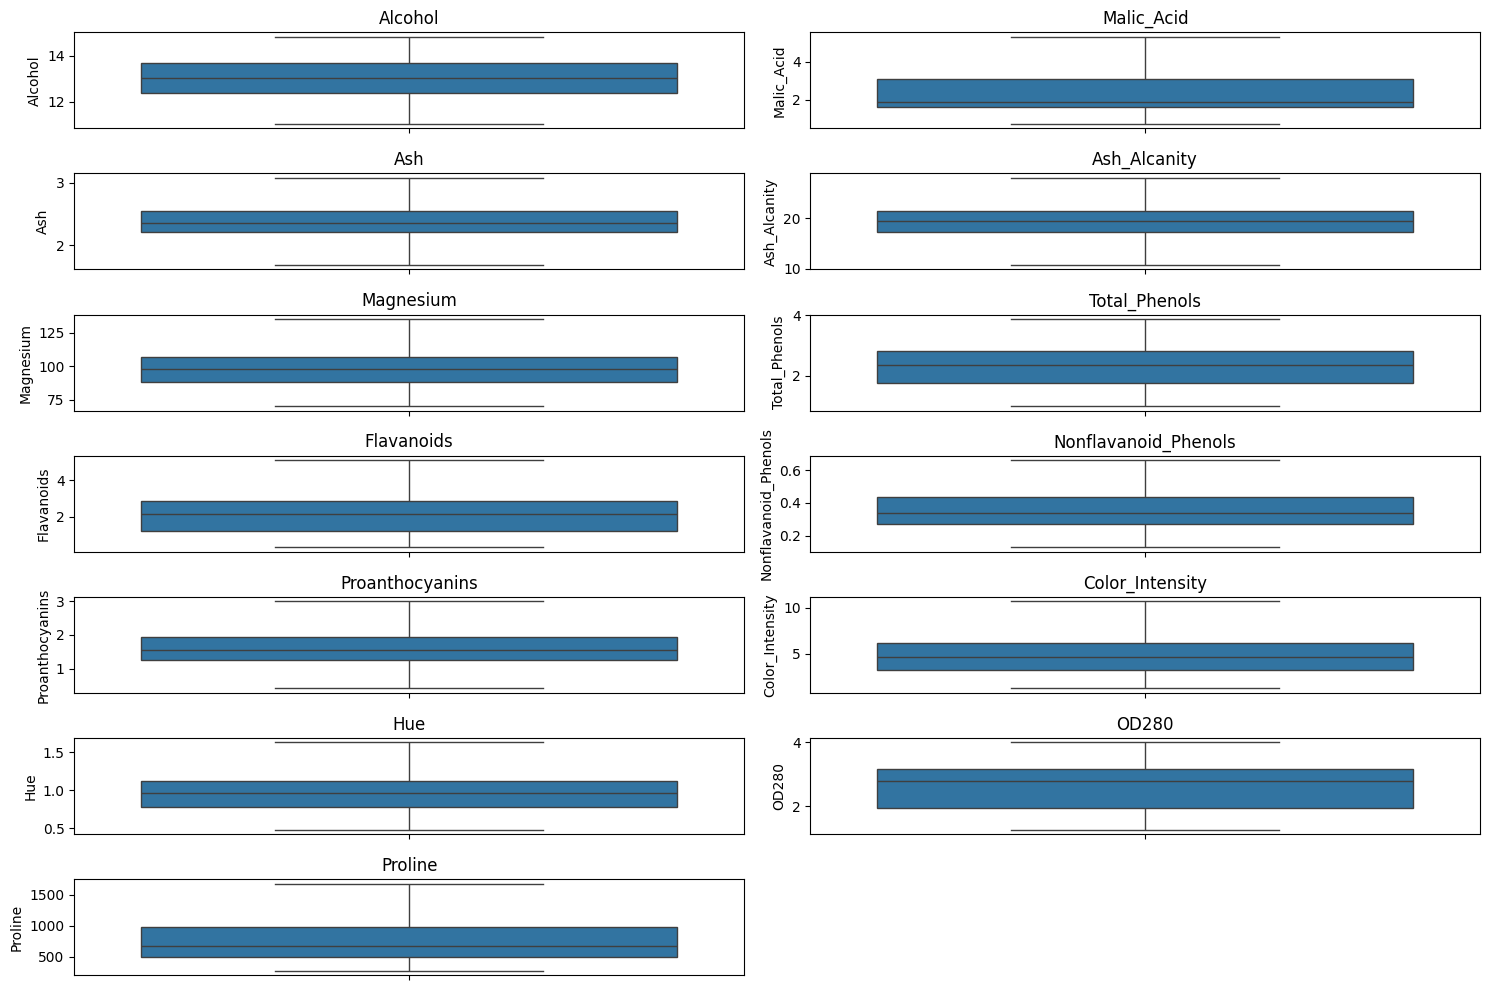

In [11]:
def handle_outliers(data):
    # Selecting numerical columns
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data

# Handle outliers in the dataset
data_cleaned = handle_outliers(data)

# Plot boxplots again to check if outliers are handled
plot_all_boxplots(data_cleaned)

# *There is no null values and no outliers*


# **Feature scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# **Importing KMeans**

In [14]:
from sklearn.cluster import KMeans

# **Elbow method for finding optimum no.of clusters**

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

wcss

[2314.0,
 1654.9060813507995,
 1266.0703462093168,
 1166.6555230515105,
 1100.4433477257605,
 1038.9752205548016,
 986.1928769323873,
 948.5899235835216,
 908.9037567420921,
 875.0793869435358]

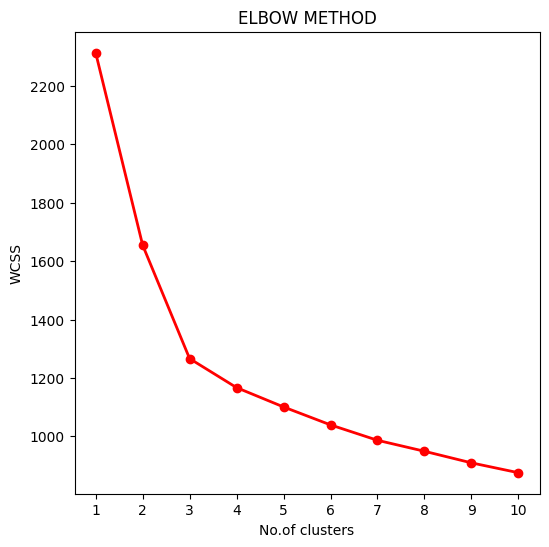

In [16]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="o")
plt.title('ELBOW METHOD')
plt.xlabel("No.of clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

# **Silhouette method to find the optimal number of clusters**

In [17]:
from sklearn.metrics import silhouette_score

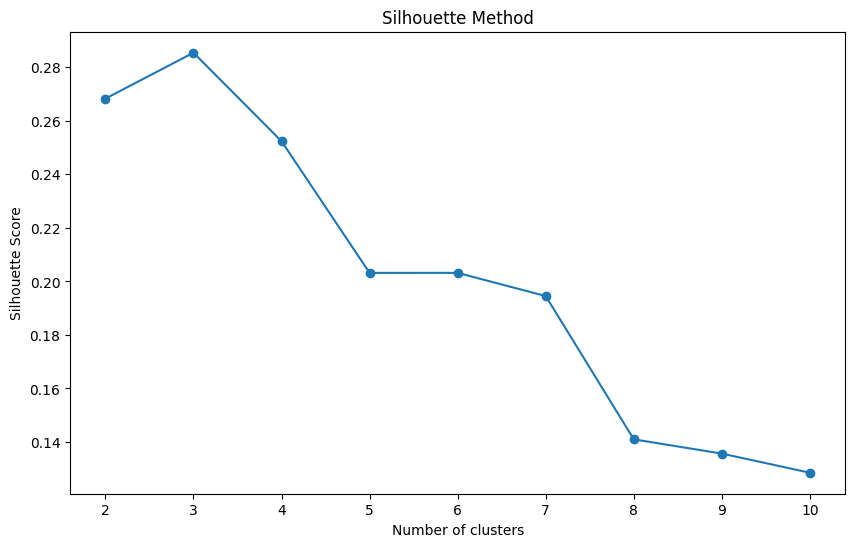

In [18]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# **Creating K-Means Model with Optimal Clusters**

In [19]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k , init = 'k-means++', max_iter=300 ,
                  n_init =10 , random_state =42)
#Fitting the input data
kmeans.fit(scaled_data)
#predicting the labels of the input data
kmeans_clusters_labels = kmeans.predict(scaled_data)

kmeans_clusters_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
data1=data.copy()

In [21]:
#adding the labels to a column
data1['Cluster_kmeans'] =kmeans_clusters_labels
#The new dataframe with the clustering done
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [22]:
#cluster center
kmeans.cluster_centers_

array([[-0.92607185, -0.40170749, -0.49600866,  0.17655379, -0.52262273,
        -0.07598265,  0.02081257, -0.03353357,  0.05239714, -0.91596806,
         0.46119397,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30310701,  0.3607047 , -0.62745662,  0.59812007,
         0.88523736,  0.97781956, -0.56208965,  0.59562237,  0.18425304,
         0.47914286,  0.77924711,  1.12518529],
       [ 0.16490746,  0.88046317,  0.19366415,  0.53777086, -0.06103856,
        -0.97933029, -1.21524764,  0.72606354, -0.79087061,  0.94341639,
        -1.17028362, -1.29241163, -0.40708796]])

In [23]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

# **Hierarchical Clustering**

# **Linkage method -Finding optimum clusters**

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create the linkage matrix
Z = linkage(scaled_data, method='ward')

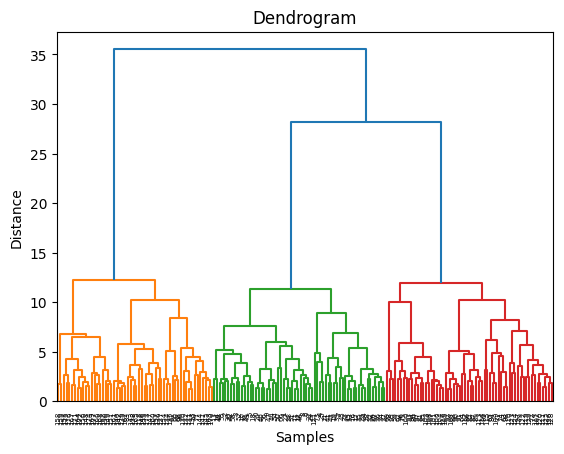

In [25]:
# Plot the dendrogram
plt.figure()
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster
# Determine the optimal number of clusters by cutting the dendrogram
max_d =27
clusters = fcluster(Z, max_d, criterion='distance')

print("Number of clusters:", len(set(clusters)))

Number of clusters: 3


# **Agglomerative Hierarchical Clustering**

# **Creating Hierarchical Clustering Model with Optimal Clusters**

In [27]:
optimal_k=3
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward', metric='euclidean')
agg_clusters_labels=agg_hc.fit_predict(scaled_data)

In [28]:
#clusters produced by agglomerative clustering
agg_clusters_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
#adding the labels to a column
data1['Cluster_agglo'] =agg_clusters_labels

In [30]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans,Cluster_agglo
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


In [31]:
data1['Cluster_agglo'].value_counts()

Cluster_agglo
2    62
1    60
0    56
Name: count, dtype: int64

# **DBSCAN Clustering**

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
# Parameters for DBSCAN
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_clusters_labels = dbscan.fit_predict(scaled_data)

In [34]:
#adding the labels to a column
data1['cluster_dbscan']=dbscan_clusters_labels

# **Silhouette Score for DBSCAN(Note: DBSCAN can assign some points as noise, marked as -1)**

In [35]:
dbscan_labels = dbscan_clusters_labels
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(scaled_data, dbscan_labels)
else:
    dbscan_score = 'N/A (all points considered noise or single cluster)'
print(f'DBSCAN Silhouette Score: {dbscan_score}')

DBSCAN Silhouette Score: N/A (all points considered noise or single cluster)


# **Visualize the clustering results for each method**

In [36]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans,Cluster_agglo,cluster_dbscan
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,-1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2,-1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,-1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,-1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,-1


we can see that all cluster labels are added to the data

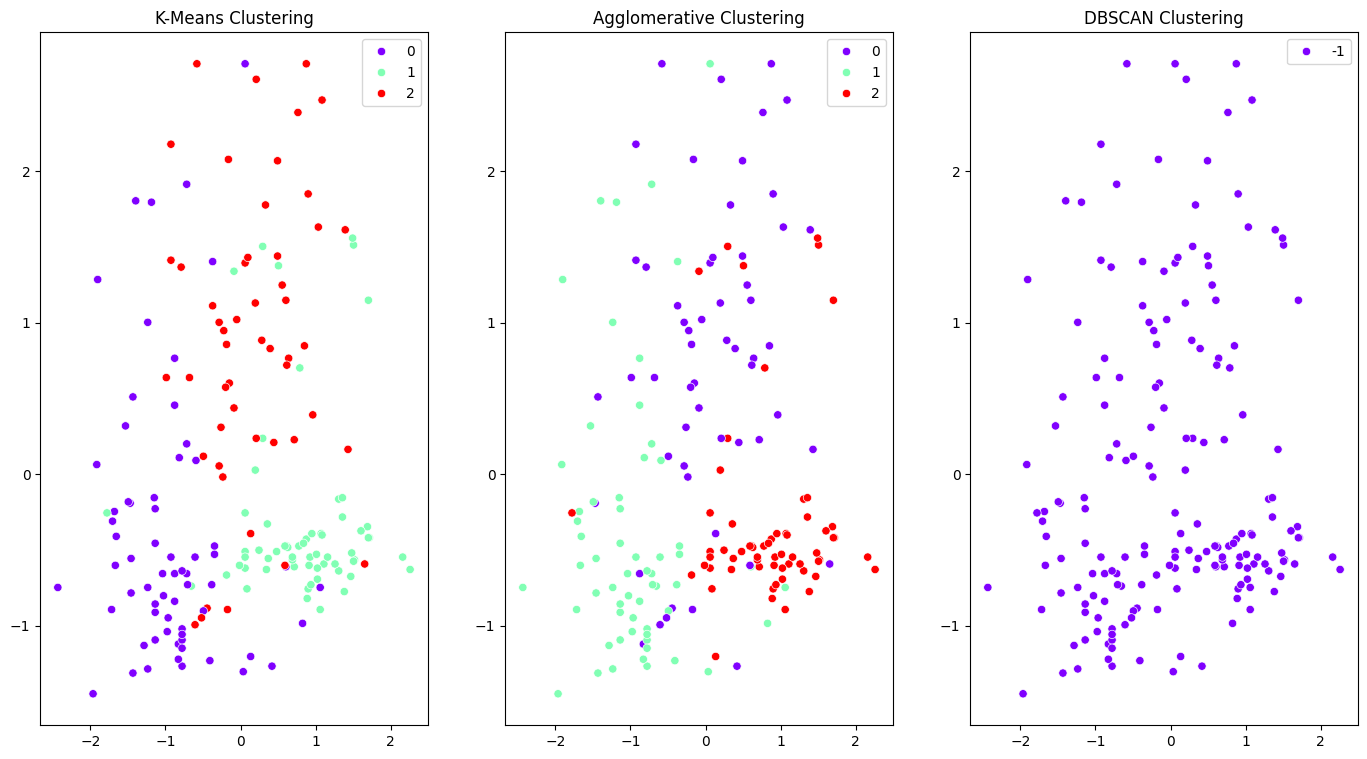

In [37]:
# Plotting the clustering results
plt.figure(figsize=(17, 9))

plt.subplot(1, 3, 1)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_clusters_labels, palette='rainbow')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=agg_clusters_labels, palette='rainbow')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_clusters_labels, palette='rainbow')
plt.title('DBSCAN Clustering')

plt.show()